In [1]:
# magic function para hacer que los graficos de matplotlib se renderizen en el notebook.
#%matplotlib notebook
%matplotlib inline

import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

advertiser_id: id de anunciante, cliente de Jampp que paga por el anuncio.<br>
action_id: id de acción.<br>
source_id: ID interna para la fuente (intercambio) desde la cual se originó el click.<br>
created: tiempo en el cual se produjo el click.<br>
latitude,longitude: ubicación de donde se produjo el click.<br>
carrier_id: Id para el operador de telefonía móvil del dispositivo.<br>
trans_id: Id de transacción(valor interno).<br>
os_minor: mínima version del OS.<br>
os_major: máxima versión del OS.<br>
agent_device : Agente para el dispositivo en el que se realizó el clic (modelo).<br>
specs_brand: especificaciones del dispositvo<br>
brand: marca del dispositivo<br>
timeToClick: tiempo de click<br>
touchX: posición en x del click<br>
touchY: posición en y del click<br>
ref_type: id de publicidad de Google ó apple_ifa ???<br>
ref_hash: id del ref_type

In [2]:
clicks = pd.read_csv('../data2/clicks.csv.gzip',compression='gzip', dtype='object')

In [3]:
clicks.head()

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
0,2,NaN,4,2019-03-06T22:42:12.755Z,6333597102633388268,1.2056887519199482,1.0702342714774236,False,1.0,iGgClCM9exiHF4K31g94XmvHEBSLKIY,6.768137412412545e+18,NaN,3.072849339937028e+18,2733035977666442898,NaN,1.563,0.905,0.078,1891515180541284343,1904083516767779093
1,0,NaN,0,2019-03-08T10:24:30.641Z,6333597102633388268,1.218923733431926,1.0712090638488148,False,4.0,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,3.025219449024123e+18,NaN,1.77408510258909e+18,392184377613098015,NaN,NaN,NaN,NaN,1891515180541284343,3086509764961796666
2,0,NaN,0,2019-03-08T15:24:16.069Z,6333597102633388268,1.2056887519199482,1.0702342714774236,False,6.0,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,5.97565607170903e+18,NaN,3.072849339937028e+18,392184377613098015,NaN,NaN,0.946,0.473,1891515180541284343,6958163894863846647
3,2,NaN,3,2019-03-06T03:08:51.543Z,6333597102633388268,1.2056887519199482,1.0702342714774236,False,45.0,YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,6.768137412412545e+18,NaN,3.072849339937028e+18,2733035977666442898,NaN,19.013,0.035,0.431,1891515180541284343,4368617728156436525
4,2,NaN,3,2019-03-06T03:32:55.570Z,6333597102633388268,1.2056887519199482,1.0702342714774236,False,45.0,X5XTOcYQovkl6yadYdAD7xioVGU9jiY,6.768137412412545e+18,NaN,3.072849339937028e+18,2733035977666442898,NaN,28.11,0.054,0.423,1891515180541284343,4368617728156436525


In [4]:
clicks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26351 entries, 0 to 26350
Data columns (total 20 columns):
advertiser_id      26351 non-null object
action_id          0 non-null object
source_id          26351 non-null object
created            26351 non-null object
country_code       26351 non-null object
latitude           26351 non-null object
longitude          26351 non-null object
wifi_connection    26351 non-null object
carrier_id         26340 non-null object
trans_id           26351 non-null object
os_minor           26339 non-null object
agent_device       3243 non-null object
os_major           26339 non-null object
specs_brand        26351 non-null object
brand              6235 non-null object
timeToClick        22977 non-null object
touchX             23011 non-null object
touchY             23011 non-null object
ref_type           26351 non-null object
ref_hash           26351 non-null object
dtypes: object(20)
memory usage: 4.0+ MB


In [5]:
print("# Anunciantes: "+str(clicks['advertiser_id'].describe()[0]))

# Anunciantes: 26351


In [12]:
anunciantes = clicks.groupby('advertiser_id').count()
len(anunciantes.index)
#Hay 7 anunciantes

7

In [26]:
carriers = clicks.groupby('carrier_id').count()
len(carriers.index)
#Hay 55 operadores moviles

55

In [24]:
# Existe sólo 1 país
clicks.drop(['action_id'],axis='columns',inplace=True)

## Alguna info
#### * Todas las conexiones son por wifi
#### * agent_device tiene muchos valores nulos
#### * brand tiene muchos valores nulos

In [19]:
clicks.drop(['action_id','country_code','latitude','longitude','trans_id','os_major','os_minor','wifi_connection','brand'],axis='columns',inplace=True)

In [27]:
clicks.head()

,advertiser_id,source_id,created,carrier_id,agent_device,specs_brand,timeToClick,touchX,touchY,ref_type,ref_hash
0,2,4,2019-03-06T22:42:12.755Z,1.0,NaN,2733035977666442898,1.563,0.905,0.078,1891515180541284343,1904083516767779093
1,0,0,2019-03-08T10:24:30.641Z,4.0,NaN,392184377613098015,NaN,NaN,NaN,1891515180541284343,3086509764961796666
2,0,0,2019-03-08T15:24:16.069Z,6.0,NaN,392184377613098015,NaN,0.946,0.473,1891515180541284343,6958163894863846647
3,2,3,2019-03-06T03:08:51.543Z,45.0,NaN,2733035977666442898,19.013,0.035,0.431,1891515180541284343,4368617728156436525
4,2,3,2019-03-06T03:32:55.570Z,45.0,NaN,2733035977666442898,28.11,0.054,0.423,1891515180541284343,4368617728156436525


In [28]:
print("touchX nulas: "+ str(clicks[clicks['touchX'].isnull()].count()))
print("touchX NO nulas: "+ str(clicks[clicks['touchX'].notnull()].count()))

touchX nulas: advertiser_id    3340
source_id        3340
created          3340
carrier_id       3329
agent_device      601
specs_brand      3340
timeToClick        16
touchX              0
touchY              0
ref_type         3340
ref_hash         3340
dtype: int64
touchX NO nulas: advertiser_id    23011
source_id        23011
created          23011
carrier_id       23011
agent_device      2642
specs_brand      23011
timeToClick      22961
touchX           23011
touchY           23011
ref_type         23011
ref_hash         23011
dtype: int64


In [29]:
# ???
clicks['touchX'].count()

23011

In [30]:
#Valores nulos en X e Y
clicks[clicks['touchX'].isnull()]['ref_hash'].count()

3340

In [31]:
clicks[clicks['touchY'].isnull()]['ref_hash'].count()

3340

In [10]:
#Valores no nulos en X e Y
clicks[clicks['touchX'].notnull()]['ref_hash'].count()

23011

In [11]:
clicks[clicks['touchY'].notnull()]['ref_hash'].count()

23011

In [14]:
clicks['touchY'].count()

23011

In [33]:
#Transformo a numerico
clicks_ok = clicks
clicks_ok['touchX'] = clicks['touchX'].apply(pd.to_numeric)
clicks_ok['touchY'] = clicks['touchY'].apply(pd.to_numeric)
clicks_ok['timeToClick'] = clicks['timeToClick'].apply(pd.to_numeric)
clicks_ok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26351 entries, 0 to 26350
Data columns (total 11 columns):
advertiser_id    26351 non-null object
source_id        26351 non-null object
created          26351 non-null object
carrier_id       26340 non-null object
agent_device     3243 non-null object
specs_brand      26351 non-null object
timeToClick      22977 non-null float64
touchX           23011 non-null float64
touchY           23011 non-null float64
ref_type         26351 non-null object
ref_hash         26351 non-null object
dtypes: float64(3), object(8)
memory usage: 2.2+ MB


In [34]:
clicks_ok.head()

,advertiser_id,source_id,created,carrier_id,agent_device,specs_brand,timeToClick,touchX,touchY,ref_type,ref_hash
0,2,4,2019-03-06T22:42:12.755Z,1.0,NaN,2733035977666442898,1.563,0.905,0.078,1891515180541284343,1904083516767779093
1,0,0,2019-03-08T10:24:30.641Z,4.0,NaN,392184377613098015,NaN,NaN,NaN,1891515180541284343,3086509764961796666
2,0,0,2019-03-08T15:24:16.069Z,6.0,NaN,392184377613098015,NaN,0.946,0.473,1891515180541284343,6958163894863846647
3,2,3,2019-03-06T03:08:51.543Z,45.0,NaN,2733035977666442898,19.013,0.035,0.431,1891515180541284343,4368617728156436525
4,2,3,2019-03-06T03:32:55.570Z,45.0,NaN,2733035977666442898,28.110,0.054,0.423,1891515180541284343,4368617728156436525


In [35]:
#Remuevo los valores nulos de X e Y
clicks_ok = clicks_ok[(clicks_ok['touchX'].notnull()) & (clicks_ok['touchY'].notnull()) & clicks_ok['timeToClick'].notnull() ]
clicks_ok = clicks_ok[['touchX','touchY','timeToClick']]
clicks_ok
clicks_ok[clicks_ok['touchX'].isnull()]
clicks_ok[clicks_ok['touchY'].isnull()]
clicks_ok[clicks_ok['timeToClick'].isnull()]

,touchX,touchY,timeToClick


In [37]:
clicks_ok.describe()

,touchX,touchY,timeToClick
count,22961.000000,22961.000000,22961.000000
mean,0.639075,1.481326,230.334055
std,0.301806,2.624922,977.085237
min,0.000000,0.000000,0.017000
25%,0.427000,0.185000,2.911000
50%,0.726000,0.646000,10.581000
75%,0.901000,0.991000,71.496000
max,1.000000,16.600000,17616.188000


In [40]:
clicks_ok.tail()

,touchX,touchY,timeToClick
26342,0.575,0.661,0.180
26343,0.001,0.333,21.362
26344,0.910,0.603,145.121
26345,0.942,0.003,4.092
26350,0.194,0.517,4.325


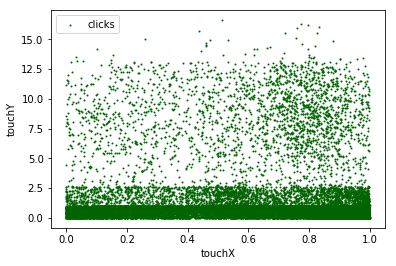

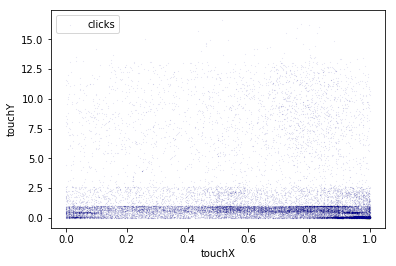

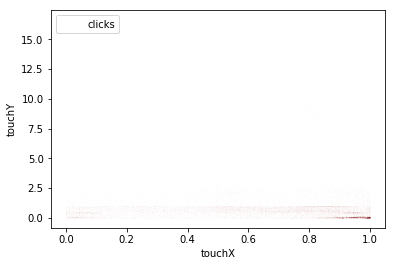

In [38]:
#Miro la distribución de los clicks
clicks_ok.plot.scatter(x='touchX', y='touchY', color='DarkGreen', label='clicks',s = 1)
clicks_ok.plot.scatter(x='touchX', y='touchY', color='DarkBlue', label='clicks',s = 0.001)
clicks_ok.plot.scatter(x='touchX', y='touchY', color='DarkRed', label='clicks',s = 0.00001)
#Parece ser que la gran mayoría de los usuarios clickean en la parte inferior de la publicidad.
#En la parte inferior derecha existe la mayor cantidad de clicks
#Se pueden diferenciar(?) 3 zonas de click en base a una aparente densidad, a saber,
#los click comprendidos entre 15~2.5 ; 2.5~1 ; 1~0

In [42]:
#ordenamos x timeToClick
c_ok_sort = clicks_ok.sort_values(by='timeToClick',ascending=False)
c_ok_sort.describe()

,touchX,touchY,timeToClick
count,22961.000000,22961.000000,22961.000000
mean,0.639075,1.481326,230.334055
std,0.301806,2.624922,977.085237
min,0.000000,0.000000,0.017000
25%,0.427000,0.185000,2.911000
50%,0.726000,0.646000,10.581000
75%,0.901000,0.991000,71.496000
max,1.000000,16.600000,17616.188000


In [44]:
#Vemos como fueron esos clicks en tiempo
#Sabemos que el timeToClick es el tiempo(segundos) que demora un usuario en hacer 1 click desde que aparece
#la impresion(publicidad)
c_ok_sort.head()

,touchX,touchY,timeToClick
23818,0.619,0.774,17616.188
5606,0.092,2.579,16915.195
13465,0.859,5.173,16698.536
14350,0.636,10.979,16466.667
15691,0.570,7.444,15776.097


In [48]:
len(c_ok_sort['timeToClick'])

22961

In [81]:
max=20000.0
min=5.0
lista = [min,10.0,20.0,30.0,60.0,90.0,120.0,180.0,max]
tot = len(c_ok_sort[(c_ok_sort['timeToClick'] > 0) & (c_ok_sort['timeToClick'] < max) ]['timeToClick'])
tot = float(tot)
for sec in enumerate(lista):
    
    reg = len(c_ok_sort[(c_ok_sort['timeToClick'] > 0) & (c_ok_sort['timeToClick'] < sec[1]) ]['timeToClick'])
    print("Cantidad Registros :"+str(reg)+" en max timeToClick " +str(sec[1])+ " | % total: "+str(100*float(reg/tot)) )
    

Cantidad Registros :8399 en max timeToClick 5.0 | % total: 36.5794172728
Cantidad Registros :11240 en max timeToClick 10.0 | % total: 48.9525717521
Cantidad Registros :14023 en max timeToClick 20.0 | % total: 61.0731239929
Cantidad Registros :15177 en max timeToClick 30.0 | % total: 66.0990374984
Cantidad Registros :16822 en max timeToClick 60.0 | % total: 73.2633596098
Cantidad Registros :17718 en max timeToClick 90.0 | % total: 77.1656286747
Cantidad Registros :18308 en max timeToClick 120.0 | % total: 79.7352031706
Cantidad Registros :19092 en max timeToClick 180.0 | % total: 83.1496886024
Cantidad Registros :22961 en max timeToClick 20000.0 | % total: 100.0


In [108]:
#Reacemos el analisis sobre el tiempo hasta los clicks. Seteamos por defecto un tiempo de click < 20 segundos
c_ok_sort2 = c_ok_sort[(c_ok_sort['timeToClick'] > 0) & (c_ok_sort['timeToClick'] < 20) ]

In [109]:
len(c_ok_sort2['timeToClick'])

14023

In [110]:
#Densidad en Y
#defino los rangos de separación
r0 = (0,1)
r1 = (1,2.5)
r2 = (2.5,5)
r3 = (5,7.5)
r4 = (7.5,10)
r5 = (10,15)
lista = [r0,r1,r2,r3,r4,r5]
res = []
#Itero los rangos y saco la media para cada de tiempo para cada caso
for rango in lista:
    r = c_ok_sort2[(c_ok_sort2['touchY'] > rango[0]) & (c_ok_sort2['touchY'] < rango[1])]['timeToClick'].mean()
    r = np.round(r,2)
    res.append(r)
res

[5.1, 7.93, 8.87, 7.87, 7.46, 8.29]

In [111]:
#Armo un df
lista = res
#lista2 = ["0.0-1.0","1.0-2.5","2.5-5.0","5.0-7.5","7.5-10.0","10.0-15.0"]
lista2 =list(range(0, 6))
lista2
data={'ubicacion':lista2,'tiempo_clicks':lista}
df = pd.DataFrame(data=data)
df

,tiempo_clicks,ubicacion
0,5.10,0
1,7.93,1
2,8.87,2
3,7.87,3
4,7.46,4
5,8.29,5


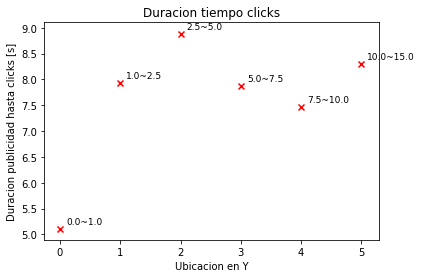

In [112]:
#Ploteo los resultados
xc = df['ubicacion']
yc = df['tiempo_clicks']

types = ["0.0~1.0","1.0~2.5","2.5~5.0","5.0~7.5","7.5~10.0","10.0~15.0"]
x_coords = xc = df['ubicacion']
y_coords = yc = df['tiempo_clicks']

for i,type in enumerate(types):
    x = x_coords[i]
    y = y_coords[i]
    plt.scatter(x, y, marker='x', color='red')
    plt.text(x+0.1, y+0.1, type, fontsize=9)
plt.title("Duracion tiempo clicks")
plt.xlabel("Ubicacion en Y")
plt.ylabel("Duracion publicidad hasta clicks [s]")

plt.show()

In [ ]:
#podemos ver que la duración de la publicidad es mucho más baja respecto del resto cuando la ubicación del
#click es muy cercana a la parte inferior de la pantalla 0~1/15.